# Advanced MLP
- Advanced techniques for training neural networks
  - Weight Initialization
  - Nonlinearity (Activation function)
  - Optimizers
  - Batch Normalization
  - Dropout (Regularization)
  - Model Ensemble

In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Dropout
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from keras.layers import BatchNormalization

Using TensorFlow backend.


## Load Dataset
- MNIST dataset

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [9]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

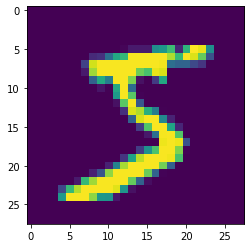

Label:  5


In [22]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

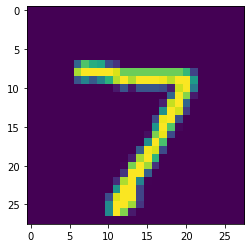

Label:  7


In [23]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

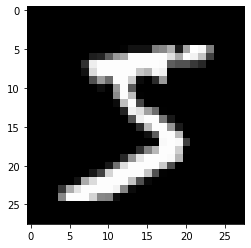

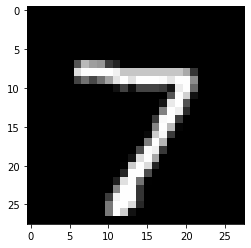

In [15]:
plt.imshow(X_train[0],cmap="gray")
plt.show()

plt.imshow(X_test[0], cmap="gray")    # show first number in the dataset
plt.show()

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
X_train.shape[0] #개수

60000

In [24]:
# reshaping X data: (n, 28, 28) => (n, 784)
# X set 2차원을 1차원으로
X_train = X_train.reshape((X_train.shape[0], -1))  #나머지 영역을 묶어 한차원으로
X_test = X_test.reshape((X_test.shape[0], -1))

In [25]:
X_train.shape

(60000, 784)

In [27]:
# use only 33% of training data to expedite the training process
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)
#자주 쓰는 함수라서. split하여 (1-p), p 순으로 리턴

In [30]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train)

(19800, 784) (10000, 784) (19800,) (10000,)
[6 9 2 ... 5 5 3]


In [32]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# one-hot encoding: 1차원 벡터->2차원 벡터
# 0 -> 1 0 0  이 한 줄이 one binary class
# 1 -> 0 1 0  행렬로 구하면 빨라
# 2 -> 0 0 1

In [33]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#y_test.shape = (10000,10)  class가 0~9

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


# Basic MLP model

In [34]:
model = Sequential()

In [35]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))
#binary 땐 sigmoid 썼지만
#multiple는 softmax 사용. binary와 똑같지만 여러번 처리
#softmax: sigmoid와의 차이점은 정규화해줌 (값의 합 1로 scaling)
#출력갯수 10개, class가 10개니까

In [36]:
# optimzer="adam" 은 디폴트값밖에 못 써. 아래처럼 사용하면 learning rate 설정 가능
sgd = optimizers.SGD(lr = 0.001) #Adam하면 금방 올라감
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 200, verbose = 0)
#validation_split: train data를 내부적으로 또 나눠.
#70개는 학습, 30개는 validation data set으로 사용하겠다
#내가 학습을 제대로 하고 있는지 검증하는 또다른 test set. overfitting 검사가능

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

* Training and validation accuracy seems to improve after around 60 epochs

In [ ]:
results = model.evaluate(X_test, y_test)

In [ ]:
print('Test accuracy: ', results[1])

## 1. Weight Initialization
- Xavier
- Uniform distribution : sqrt( 6 / (fan_in + fan_out))
- Normal distribution  : N(0, sqrt(2. / (fan_in + fan_out)))

- HE
- Uniform distribution : limit is sqrt( 6 / fan_in)
- Normal distribution : N(0, sqrt(2 / fan_in))

In [ ]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [ ]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)

In [ ]:
print('Test accuracy: ', results[1])

## 2. Nonlinearity (Activation function)